# **Data Exploration**

In [360]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

df = pd.read_csv("NBA Project Final Data Set.csv") 

#Look at my table's first few fows
df.head()

,Date,Team,Points,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg
0,10/16/18,PHI,87,0.448,0.420,0.299,0.264,12.2,77.4,46.1,52.9,7.7,8.3,14.1,100,83.4,100.7
1,10/16/18,BOS,105,0.509,0.490,0.381,0.144,22.6,87.8,53.9,50.0,6.7,8.2,11.9,100,100.7,83.4
2,10/16/18,OKC,100,0.466,0.418,0.407,0.407,28.1,63.0,43.7,63.6,11.7,8.7,11.5,100,97.7,105.6
3,10/16/18,GSW,108,0.525,0.479,0.274,0.189,37.0,71.9,56.3,66.7,6.8,13.0,16.9,100,105.6,97.7
4,10/17/18,MIL,113,0.602,0.576,0.400,0.235,25.6,83.6,58.2,61.9,4.9,7.4,18.3,100,110.2,109.2


In [361]:
#Looking at my column's datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 17 columns):
Date      2460 non-null object
Team      2460 non-null object
Points    2460 non-null int64
TS%       2460 non-null float64
eFG%      2460 non-null float64
3PAr      2460 non-null float64
FTr       2460 non-null float64
ORB%      2460 non-null float64
DRB%      2460 non-null float64
TRB%      2460 non-null float64
AST%      2460 non-null float64
STL%      2460 non-null float64
BLK%      2460 non-null float64
TOV%      2460 non-null float64
USG%      2460 non-null int64
ORtg      2460 non-null float64
DRtg      2460 non-null float64
dtypes: float64(13), int64(2), object(2)
memory usage: 326.8+ KB


In [362]:
#Checking to see if my columns have any whitespace
df.columns = df.columns.map(str.strip)
df.columns

Index(['Date', 'Team', 'Points', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg'],
      dtype='object')

In [363]:
#Ensuring my table has the correct amount of rows, columns
df.shape

(2460, 17)

In [364]:
#Viewing correlations between variables
df.corr

<bound method DataFrame.corr of           Date Team  Points    TS%   eFG%   3PAr    FTr  ORB%  DRB%  TRB%  \
0     10/16/18  PHI      87  0.448  0.420  0.299  0.264  12.2  77.4  46.1   
1     10/16/18  BOS     105  0.509  0.490  0.381  0.144  22.6  87.8  53.9   
2     10/16/18  OKC     100  0.466  0.418  0.407  0.407  28.1  63.0  43.7   
3     10/16/18  GSW     108  0.525  0.479  0.274  0.189  37.0  71.9  56.3   
4     10/17/18  MIL     113  0.602  0.576  0.400  0.235  25.6  83.6  58.2   
...        ...  ...     ...    ...    ...    ...    ...   ...   ...   ...   
2455   4/10/19  DEN      99  0.524  0.506  0.379  0.195  26.1  85.4  56.4   
2456   4/10/19  UTA     137  0.568  0.509  0.330  0.311  29.8  76.9  52.3   
2457   4/10/19  LAC     143  0.600  0.566  0.264  0.283  23.1  70.2  47.7   
2458   4/10/19  SAC     131  0.636  0.615  0.448  0.167  28.6  62.2  44.3   
2459   4/10/19  POR     136  0.675  0.659  0.264  0.242  37.8  71.4  55.7   

      AST%  STL%  BLK%  TOV%  USG%   ORtg  

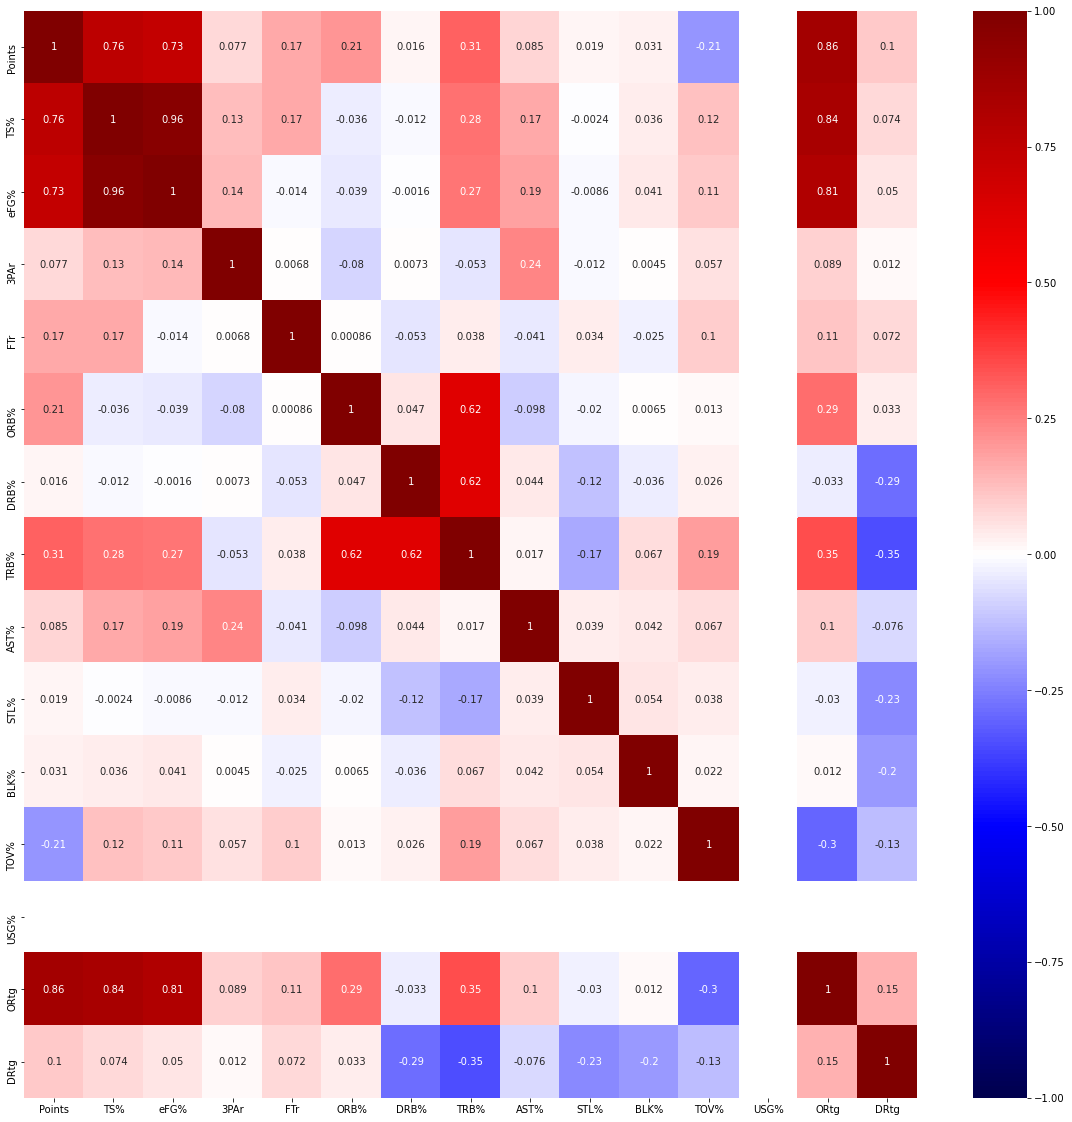

In [365]:
#Creating a correlation matrix to easily spot multicollinearity

plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

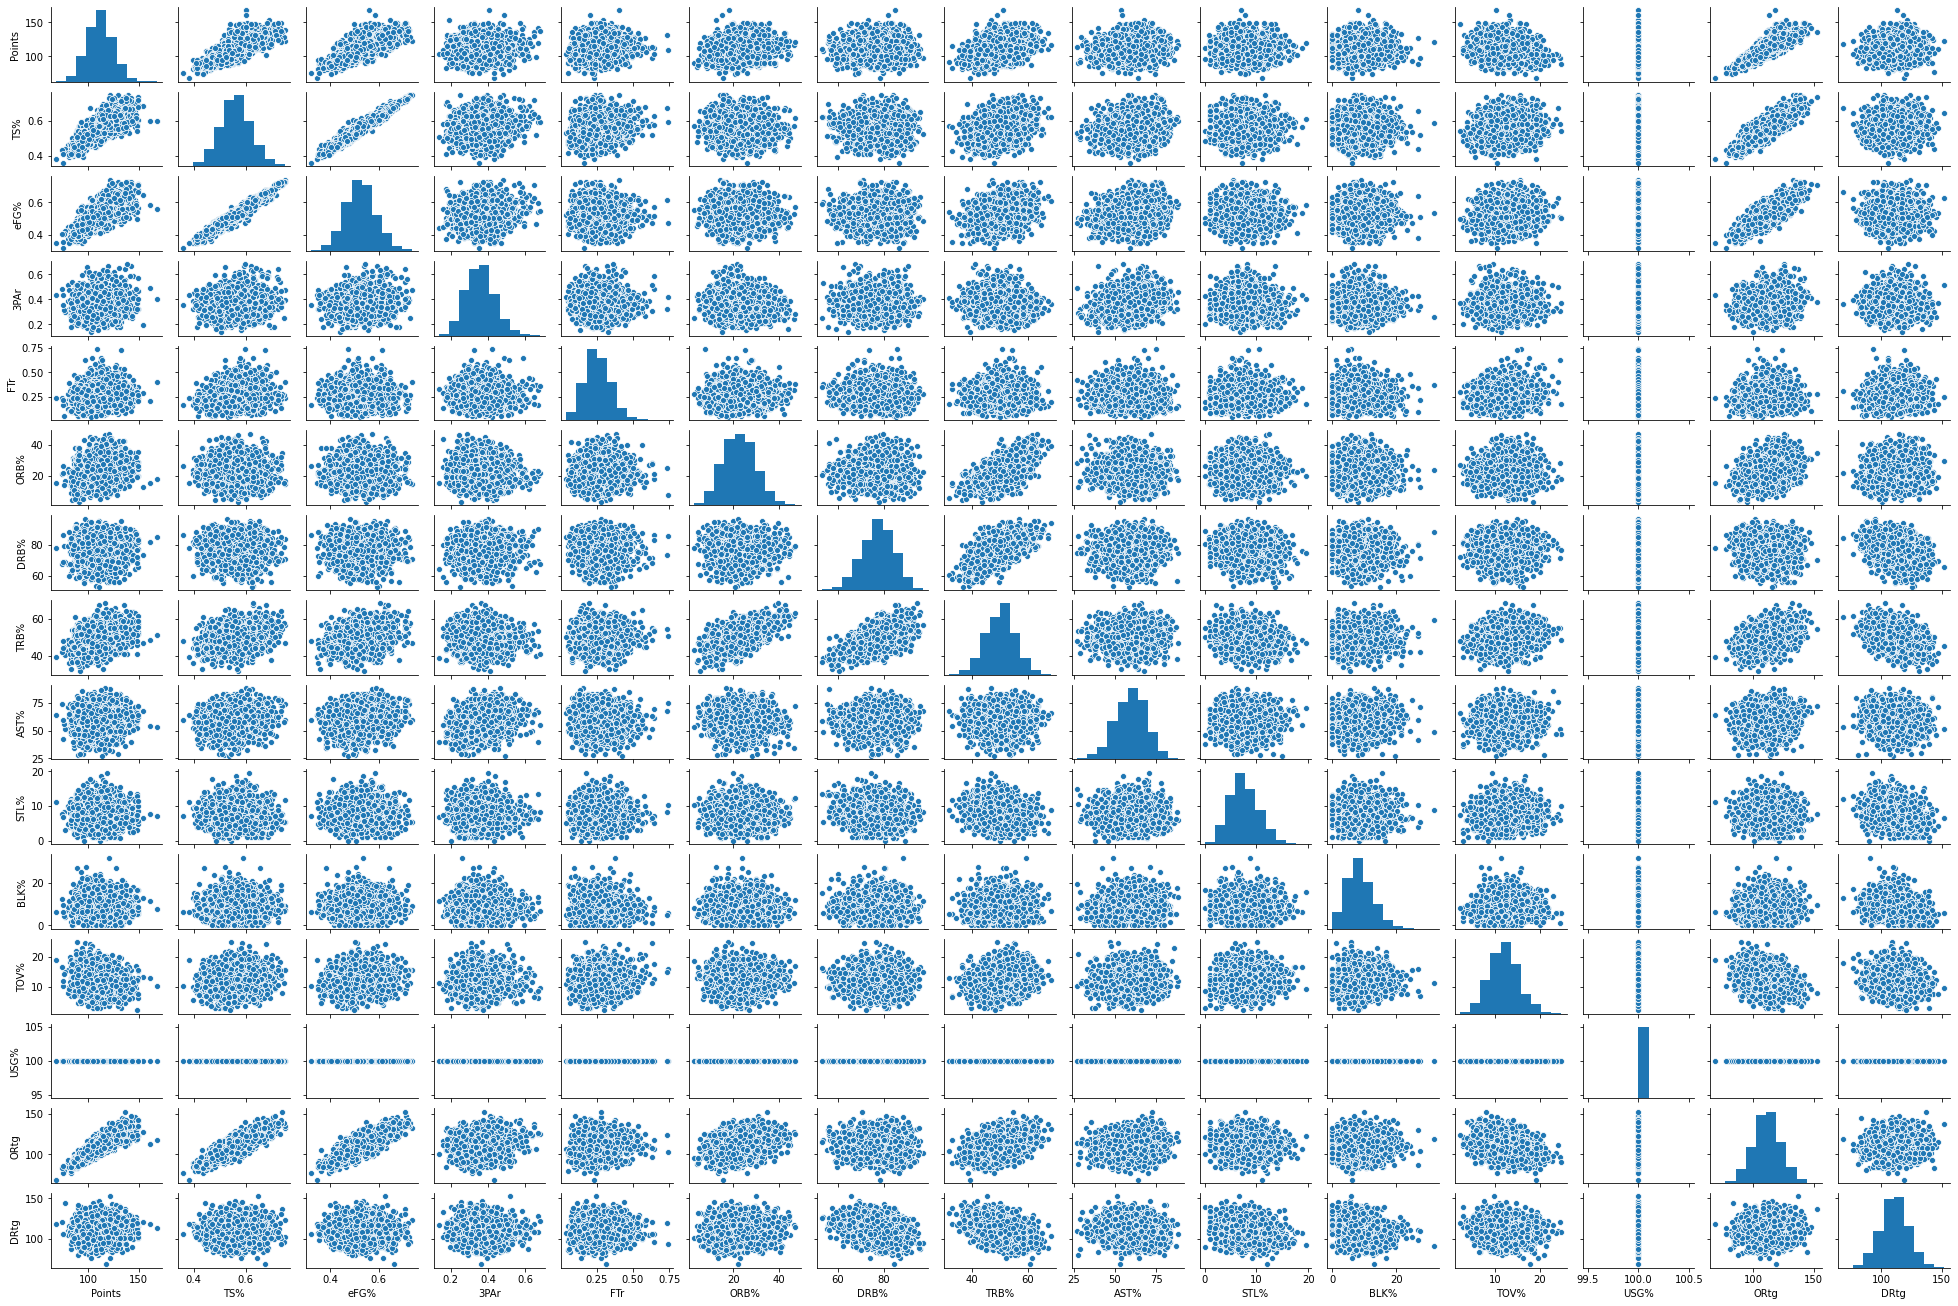

In [366]:
#Translating heatmap from above to scatterplots for a different perspective on variable-to-variable relations

sns.pairplot(df, height=1.2, aspect=1.5);

In [367]:
#Dropping usage column after seeing above plots
#A team's total Usage will always add up to be 100%

df = df.drop(columns=['USG%'])
df

,Date,Team,Points,TS%,eFG%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg
0,10/16/18,PHI,87,0.448,0.420,0.299,0.264,12.2,77.4,46.1,52.9,7.7,8.3,14.1,83.4,100.7
1,10/16/18,BOS,105,0.509,0.490,0.381,0.144,22.6,87.8,53.9,50.0,6.7,8.2,11.9,100.7,83.4
2,10/16/18,OKC,100,0.466,0.418,0.407,0.407,28.1,63.0,43.7,63.6,11.7,8.7,11.5,97.7,105.6
3,10/16/18,GSW,108,0.525,0.479,0.274,0.189,37.0,71.9,56.3,66.7,6.8,13.0,16.9,105.6,97.7
4,10/17/18,MIL,113,0.602,0.576,0.400,0.235,25.6,83.6,58.2,61.9,4.9,7.4,18.3,110.2,109.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,4/10/19,DEN,99,0.524,0.506,0.379,0.195,26.1,85.4,56.4,59.0,6.4,6.8,11.3,105.5,101.2
2456,4/10/19,UTA,137,0.568,0.509,0.330,0.311,29.8,76.9,52.3,66.0,6.8,14.1,12.4,116.8,121.9
2457,4/10/19,LAC,143,0.600,0.566,0.264,0.283,23.1,70.2,47.7,63.0,6.0,7.0,9.1,121.9,116.8
2458,4/10/19,SAC,131,0.636,0.615,0.448,0.167,28.6,62.2,44.3,50.0,5.1,1.5,8.8,134.5,139.7


# **MODEL 1**

In [368]:
#Creating a separate dataframe with different column names for statsmodels

stats_model_df = df
stats_model_df.rename(inplace=True,columns={"TS%": "TS", "eFG%": "eFG","3PAr":"Three_PAr","ORB%":"ORB","DRB%":"DRB","TRB%":"TRB","AST%":"AST","STL%":"STL","BLK%":"BLK","TOV%":"TOV"})

# Creating my feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Points ~ TS + eFG + Three_PAr + FTr + ORB + DRB + TRB + AST + STL + BLK + TOV + ORtg + DRtg', data=stats_model_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     570.0
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:22:46   Log-Likelihood:                -8018.9
No. Observations:                2460   AIC:                         1.607e+04
Df Residuals:                    2446   BIC:                         1.615e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6483      3.592     -2.130      0.033     -14.691      -0.606
TS            -6.2543     20.050     -0.312      0.755     -45.571      33.063
eFG           17.1113     10.298      1.662      0.097      -3.083      37.305
Three_PAr     -1.6582      1.729     -0.959      0.338      -5.050       1.733
FTr           11.5882      1.918      6.041      0.000       7.827      15.350
ORB            0.0346      0.067      0.520      0.603      -0.096       0.165
DRB            0.1910      0.037      5.201      0.000       0.119       0.263
TRB           -0.2332      0.085     -2.746      0.006      -0.400      -0.067
AST           -0.0180      0.014     -1.277      0.202      -0.046       0.010
STL            0.1401      0.054      2.616      0.009       0.035       0.245
BLK            0.0718      0.031      2.328      0.020       0.011       0.132
TOV            0.1928      0.126      1.533      0.125      -0.054       0.439
ORtg           0.9600      0.087     11.095      0.000       0.790       1.130
DRtg          -0.0225      0.017     -1.343      0.179      -0.055       0.010
==============================================================================
Omnibus:                      575.591   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.111
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       7.322   Cond. No.                     3.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like I have a lot multicollinearity between variables. Will use the previous heat map and p values to determine which ones to drop

In [369]:
#Dropping TS because eFG and TS have high multicollinearity, TS has higher p value
stats_model_df = stats_model_df.drop(columns=['TS'])

#Dropping Total Rebounds(TRB) because Offensive Rebounds(ORB) and Defensive Rebounds(DRB) add up to TRB
stats_model_df = stats_model_df.drop(columns=['TRB'])


#Dropping Three_PAr and Offensive Rating (ORtg) as this is accounted for in eFG
stats_model_df = stats_model_df.drop(columns=['Three_PAr'])
stats_model_df = stats_model_df.drop(columns=['ORtg'])


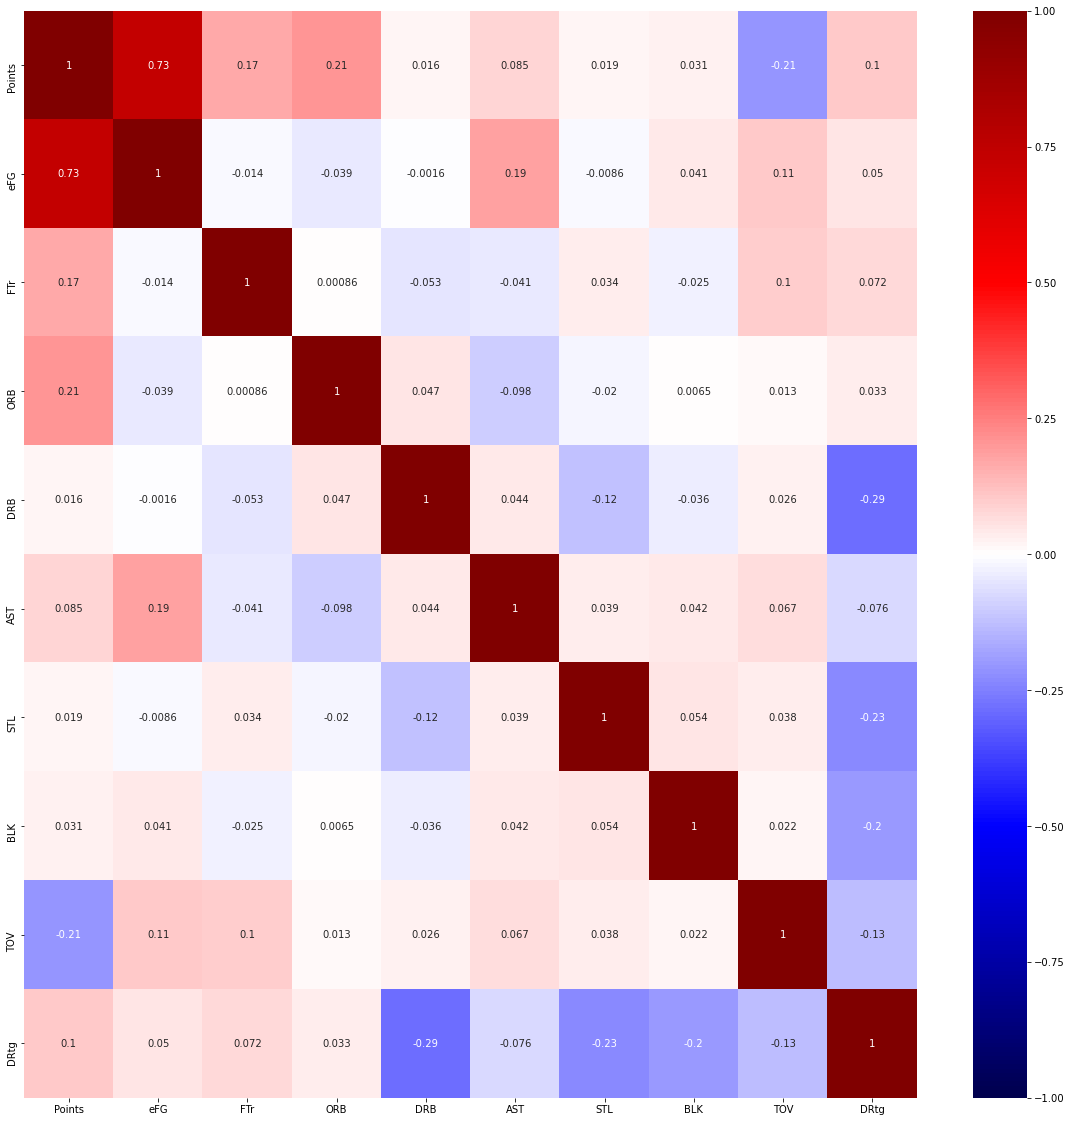

In [370]:
#A much cleaner heatmap

plt.subplots(figsize=(20,20))
sns.heatmap(stats_model_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

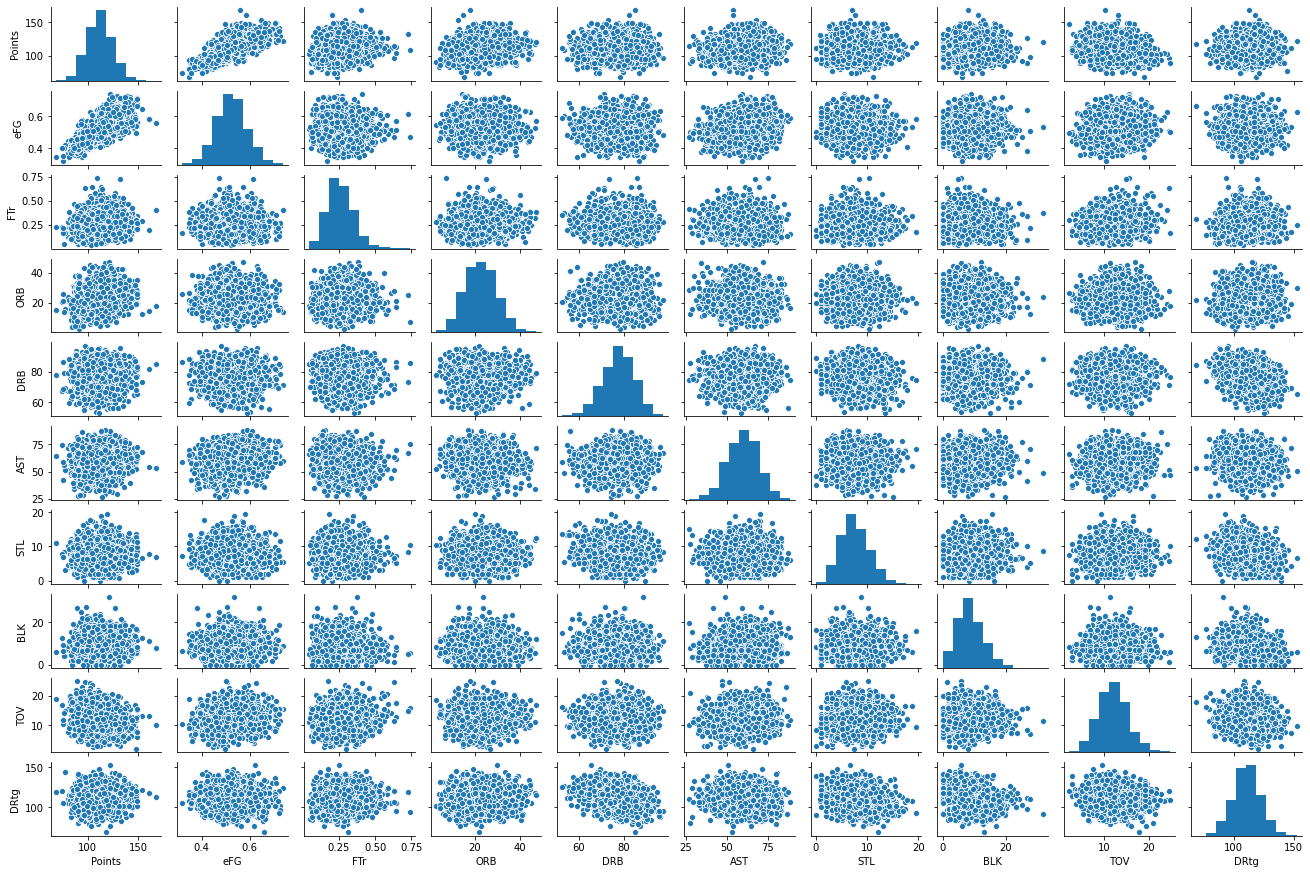

In [371]:
#And a much more random looking scatter plot

sns.pairplot(stats_model_df, height=1.2, aspect=1.5);

**Time to train_test_split**


In [372]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = stats_model_df.loc[:,['eFG', 'FTr', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'DRtg']]

y = stats_model_df['Points']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [373]:
#Standardize with standard scalar

lm = LinearRegression()
lm.fit(X_train,y_train)

scaler = StandardScaler()

# **Model 2**

In [253]:
#My model fits the training data almost perfectly with an R^2 or 0.996

y, X = patsy.dmatrices('Points ~ eFG + FTr + ORB + DRB + AST + STL + BLK + TOV + DRtg', data=stats_model_df, return_type="dataframe")

# Creating my new model
model = sm.OLS(y_train, X_train)

# Fit my model
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Points   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.461e+04
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:39:50   Log-Likelihood:                         -4911.9
No. Observations:                1476   AIC:                                      9842.
Df Residuals:                    1467   BIC:                                      9889.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eFG          161.0743      2.877     55.981      0.000     155.430     166.718
FTr           30.5674      1.946     15.709      0.000      26.750      34.384
ORB            0.4504      0.025     17.836      0.000       0.401       0.500
DRB            0.1502      0.019      7.702      0.000       0.112       0.188
AST           -0.0201      0.018     -1.098      0.272      -0.056       0.016
STL            0.3211      0.061      5.245      0.000       0.201       0.441
BLK            0.0956      0.041      2.355      0.019       0.016       0.175
TOV           -1.1912      0.054    -21.968      0.000      -1.298      -1.085
DRtg           0.0812      0.013      6.427      0.000       0.056       0.106
==============================================================================
Omnibus:                      275.977   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1026.584
Skew:                           0.875   Prob(JB):                    1.20e-223
Kurtosis:                       6.692   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The condition number is still quite high. Let me plot a LARS graph to see what variables this model deems least important**

In [374]:
from sklearn.linear_model import lars_path

## Scale the variables
std = StandardScaler()
std.fit(X_train)

X_tr = std.transform(X_train)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train, method='lasso')

Computing regularization path using the LARS ...


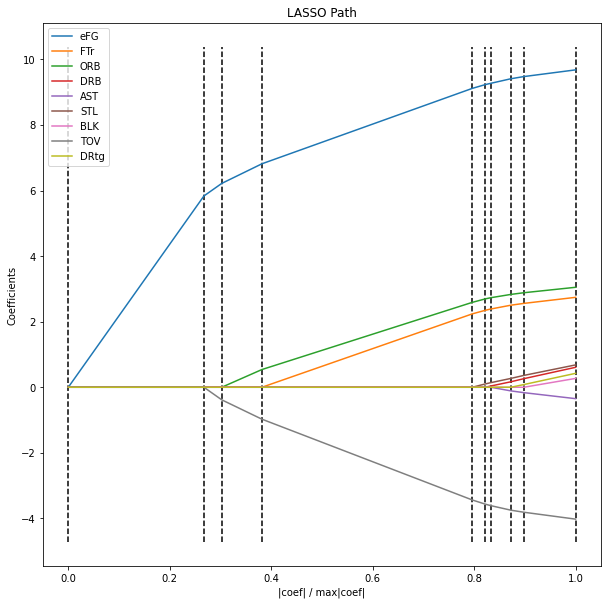

In [375]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train)
plt.show()

**In reading this graph, LARS suggests that eFG is by far the most important feature in my model, as it is the last to be zeroed out. Turnover percentage (TOV%), Offensive Rebounds (ORB), Free Throw Rate (FTr) are all important as well. Interestingly enough, Team assists (AST) does not seem to be a big factor in total team points scored.**

In [377]:
#Dropping columns to reduce condition number

stats_model_df.drop(columns=['DRtg'])
stats_model_df.drop(columns=['DRB'])
stats_model_df.drop(columns=['AST'])

,Date,Team,Points,eFG,FTr,ORB,DRB,STL,BLK,TOV,DRtg
0,10/16/18,PHI,87,0.420,0.264,12.2,77.4,7.7,8.3,14.1,100.7
1,10/16/18,BOS,105,0.490,0.144,22.6,87.8,6.7,8.2,11.9,83.4
2,10/16/18,OKC,100,0.418,0.407,28.1,63.0,11.7,8.7,11.5,105.6
3,10/16/18,GSW,108,0.479,0.189,37.0,71.9,6.8,13.0,16.9,97.7
4,10/17/18,MIL,113,0.576,0.235,25.6,83.6,4.9,7.4,18.3,109.2
...,...,...,...,...,...,...,...,...,...,...,...
2455,4/10/19,DEN,99,0.506,0.195,26.1,85.4,6.4,6.8,11.3,101.2
2456,4/10/19,UTA,137,0.509,0.311,29.8,76.9,6.8,14.1,12.4,121.9
2457,4/10/19,LAC,143,0.566,0.283,23.1,70.2,6.0,7.0,9.1,116.8
2458,4/10/19,SAC,131,0.615,0.167,28.6,62.2,5.1,1.5,8.8,139.7


**One more train_test_split on the new dataframe**

In [378]:
X = stats_model_df.loc[:,['eFG', 'FTr', 'ORB', 'BLK', 'STL', 'TOV']]

y = stats_model_df['Points']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

# **Final Model**

In [379]:
#Standardize with standard scalar

lm = LinearRegression()
lm.fit(X_train,y_train)

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

y, X = patsy.dmatrices('Points ~ eFG + FTr + ORB + STL + BLK + TOV', data=stats_model_df, return_type="dataframe")

# Creating my new model
model = sm.OLS(y_train, X_train)

# Fit my model
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

#Looks like my R^2 and adj. R^2 has gone down, but I've reduced multicollinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Points   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          6.055e+04
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:41:41   Log-Likelihood:                         -4986.9
No. Observations:                1476   AIC:                                      9986.
Df Residuals:                    1470   BIC:                                  1.002e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eFG          187.3701      1.858    100.838      0.000     183.725     191.015
FTr           36.5808      1.971     18.560      0.000      32.715      40.447
ORB            0.5545      0.025     22.166      0.000       0.505       0.604
BLK            0.1124      0.042      2.660      0.008       0.030       0.195
STL            0.3602      0.063      5.675      0.000       0.236       0.485
TOV           -1.1034      0.056    -19.737      0.000      -1.213      -0.994
==============================================================================
Omnibus:                      194.225   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.252
Skew:                           0.635   Prob(JB):                    8.53e-143
Kurtosis:                       6.004   Cond. No.                         341.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Condition number warning is now gone! I'm going to make one more LARS graph for my final model**

In [380]:
from sklearn.linear_model import lars_path

## Scale the variables
std = StandardScaler()
std.fit(X_train)

X_tr = std.transform(X_train)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train, method='lasso')

Computing regularization path using the LARS ...


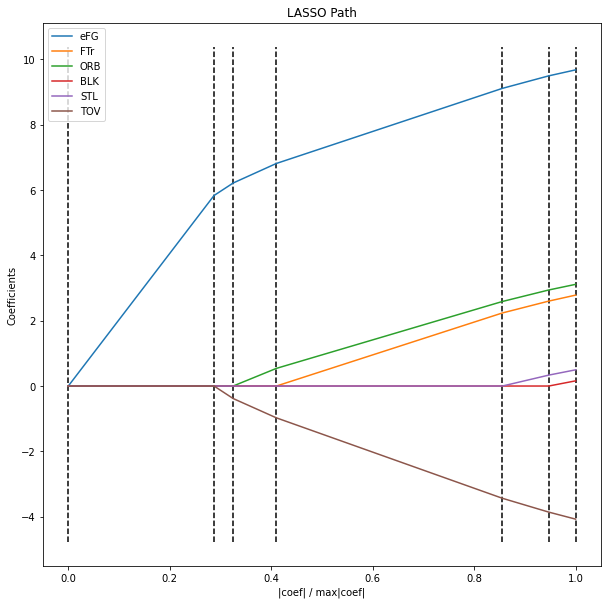

In [381]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train)
plt.show()

**Time to test 5 Linear Regression Assumptions**

In [424]:
import patsy
import scipy.stats as stats

In [425]:
y_pred = lm.predict(X_train)

In [426]:
def diagnostic_plot(x_test, y_pred, y_test):
    
    
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    res = y_test - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

**Assumption 1:** Regression is linear and correctly specified

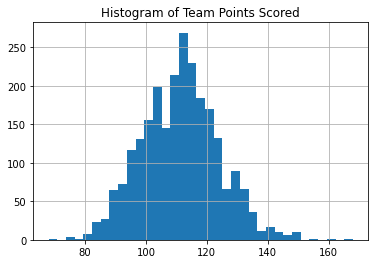

In [427]:
stats_model_df['Points'].hist(bins=35)
plt.title('Histogram of Team Points Scored');

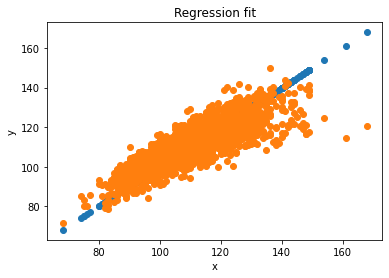

In [428]:
plt.scatter(stats_model_df.Points,y)
plt.scatter(stats_model_df.Points,stats_model_df.predict);
plt.title("Regression fit")
plt.xlabel("x");
plt.ylabel("y");

Histogram looks normally distributed, regression fit looks to be linearly correlated.

**Assumption 2:** Residuals are normally distributed with zero mean

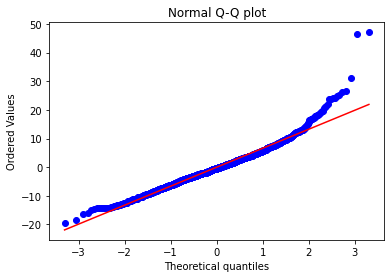

In [429]:
#Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 

stats.probplot(y_train - y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

The relationship between the theoretical percentiles and the sample percentiles is approximately linear. Therefore, the normal probability plot of the residuals suggests that the error terms are indeed normally distributed for this example.

**Assumption 3:** Error terms must have constant variance

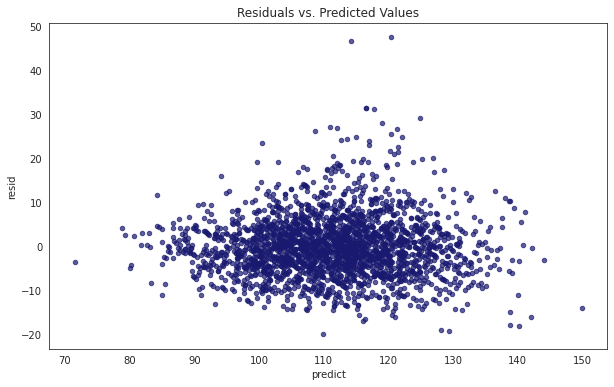

In [466]:
lr = LinearRegression()
fit = lr.fit(X,y)

stats_model_df['predict']= lr.predict(X)

stats_model_df['resid']=stats_model_df['Points'] - stats_model_df['predict']

with sns.axes_style('white'):
    plot=stats_model_df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.7,figsize=(10,6), color =  'midnightblue')
plt.title("Residuals vs. Predicted Values");


Variance of the errors seem to be constant. No clear pattern here

**Assumption 4: Errors are uncorrelated across observations**

Referring to my residual plot above, my graph doesn't seem to indicated any patterns.

**Assumption 5: No perfect multicolinearity**

Referring to my previous heatmap and scatterplots, I already removed columns that were flagged for multicollinearity.

# **Setting up 3 models (linear, polynomial, ridge)**

In [441]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [442]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.723
Ridge Regression val R^2: 0.723
Degree 2 polynomial regression val R^2: 0.724


In [443]:
#All around the same R^2. Let me use k-fold to see which one results in the highest mean R^2

from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
print(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
print(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2'))
print(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2'))

[0.71128139 0.70011387 0.71428782 0.72485824 0.70920962]
[0.70947595 0.68580085 0.70993474 0.71788706 0.69698781]
[0.71128139 0.70011387 0.71428782 0.72485824 0.70920962]


In [444]:
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')))

0.7119501870314175
0.7040172824195039
0.7119501870314175


All 3 models seem to be generating around the same R^2 scores. In this case, I'm going to go ahead and choose a linear model for my dataset for simplicity's sake. From my EDA graphs above and it doesn't seem like I need to add polynomial terms or use a ridge regression.

# **Reducing variance through Regularization**

In [445]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [446]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [447]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [448]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [449]:
#This seems to be the optimal alpha suggested

lasso_model.alpha_

0.01

In [450]:
#Coefficient values with my optimal alpha

list(zip(X_train.columns, lasso_model.coef_))

[('eFG', 9.669366495170697),
 ('FTr', 2.772111534823659),
 ('ORB', 3.102614810011919),
 ('BLK', 0.14828941637986653),
 ('STL', 0.48564057689993056),
 ('TOV', -4.061971799425848)]

In [473]:
lasso_model.intercept_

111.08536585365852

# Final Model

**Predicted Team Points Total = 111 + 9.67(eFG%) + 2.77(FTr%) + 3.1(ORB%) + 0.15(BLK%) + 0.49(STL%) - 4.06(TOV%)**


See appendix for metric definitions

# Predict Model on Test Set

In [451]:
test_set_pred = lasso_model.predict(X_te)

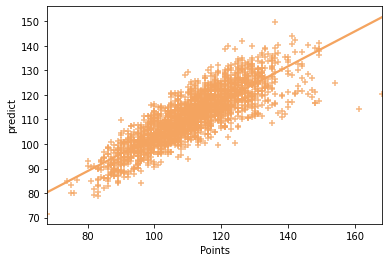

In [620]:
# Residuals vs. Predicted

sns.regplot(x="Points", y="predict", ci=35, color = 'sandybrown',data=stats_model_df, marker="+")


In [557]:
#Final R^2 score on the test set. I'm pretty happy with a 0.71 R^2.

print('Final R^2:', r2_score(y_test, test_set_pred))

Final R^2: 0.7069454273730162


In [556]:
#Mean Squared Error of Model
import math

print('Mean Squared Error:',mean_squared_error(stats_model_df['Points'], stats_model_df['predict']))

#Root mean squared error: take square root of this
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(stats_model_df['Points'], stats_model_df['predict'])))

Mean Squared Error: 45.757092003956735
Root Mean Squared Error: 6.764398864936687


In [555]:
#Mean Absolute Error. Also happy with a 5.1 mean absolute error. 

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print('Mean Absolute Error:',(mae(y_test, test_set_pred)))

Mean Absolute Error: 5.1113778053396315


**Appendix**

**Advanced Box Score Metric Glossary**

1. eFG%: Effective Field Goal Percentage - Measures field goal percentage adjusting for made 3-point field goals being 1.5 times more valuable than made 2-point field. 
    * FGM + (0.5 * 3PM)) / FGA
2. FTr%: Free Throw Rate - Ratio of free throw Attempts to field goal attempts. 
    * FTA/FGA
3. ORB%: Offensive rebound percentage - an estimate of the percentage of available offensive rebounds a team grabbed. 
    * 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)
4. BLK%: Offensive rebound percentage - an estimate of the percentage of opponent two-point field goal attempts blocked. 
    * 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA))
5. STL%: Steal percentage - an estimate of the percentage of opponent possessions that end with a steal by the team. 
    * 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss)
6. TOV%: Turnover percentage - an estimate of turnovers per 100 plays.
    * 100 * TOV / (FGA + 0.44 * FTA + TOV)

In [457]:
#A 4 OT game. Crazy

outlier_df = stats_model_df[stats_model_df.resid > 40]
outlier_df


,Date,Team,Points,eFG,FTr,ORB,DRB,AST,STL,BLK,TOV,DRtg,predict,resid
1854,3/1/19,CHI,168,0.559,0.403,18.0,85.0,53.6,7.0,7.9,10.2,112.9,120.455110,47.544890
1855,3/1/19,ATL,161,0.585,0.203,15.0,82.0,54.1,7.7,11.3,13.0,117.9,114.262616,46.737384


In [458]:
extra_df = stats_model_df[stats_model_df.Points >= 100]
extra_df

,Date,Team,Points,eFG,FTr,ORB,DRB,AST,STL,BLK,TOV,DRtg,predict,resid
1,10/16/18,BOS,105,0.490,0.144,22.6,87.8,50.0,6.7,8.2,11.9,83.4,102.234977,2.765023
2,10/16/18,OKC,100,0.418,0.407,28.1,63.0,63.6,11.7,8.7,11.5,105.6,102.291654,-2.291654
3,10/16/18,GSW,108,0.479,0.189,37.0,71.9,66.7,6.8,13.0,16.9,97.7,102.261738,5.738262
4,10/17/18,MIL,113,0.576,0.235,25.6,83.6,61.9,4.9,7.4,18.3,109.2,111.555932,1.444068
5,10/17/18,CHO,112,0.533,0.239,16.4,74.4,51.2,7.8,17.6,9.8,110.2,111.830193,0.169807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,4/10/19,SAS,105,0.511,0.205,18.6,86.5,53.7,6.3,3.7,9.4,98.5,108.325405,-3.325405
2456,4/10/19,UTA,137,0.509,0.311,29.8,76.9,66.0,6.8,14.1,12.4,121.9,112.688768,24.311232
2457,4/10/19,LAC,143,0.566,0.283,23.1,70.2,63.0,6.0,7.0,9.1,116.8,121.461803,21.538197
2458,4/10/19,SAC,131,0.615,0.167,28.6,62.2,50.0,5.1,1.5,8.8,139.7,128.228772,2.771228


In [459]:
extra_df.eFG.describe()

count    2011.000000
mean        0.541078
std         0.055290
min         0.394000
25%         0.500000
50%         0.536000
75%         0.576000
max         0.739000
Name: eFG, dtype: float64

In [463]:
extra_df

,Date,Team,Points,eFG,FTr,ORB,DRB,AST,STL,BLK,TOV,DRtg,predict,resid
1,10/16/18,BOS,105,0.490,0.144,22.6,87.8,50.0,6.7,8.2,11.9,83.4,102.234977,2.765023
2,10/16/18,OKC,100,0.418,0.407,28.1,63.0,63.6,11.7,8.7,11.5,105.6,102.291654,-2.291654
3,10/16/18,GSW,108,0.479,0.189,37.0,71.9,66.7,6.8,13.0,16.9,97.7,102.261738,5.738262
4,10/17/18,MIL,113,0.576,0.235,25.6,83.6,61.9,4.9,7.4,18.3,109.2,111.555932,1.444068
5,10/17/18,CHO,112,0.533,0.239,16.4,74.4,51.2,7.8,17.6,9.8,110.2,111.830193,0.169807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,4/10/19,SAS,105,0.511,0.205,18.6,86.5,53.7,6.3,3.7,9.4,98.5,108.325405,-3.325405
2456,4/10/19,UTA,137,0.509,0.311,29.8,76.9,66.0,6.8,14.1,12.4,121.9,112.688768,24.311232
2457,4/10/19,LAC,143,0.566,0.283,23.1,70.2,63.0,6.0,7.0,9.1,116.8,121.461803,21.538197
2458,4/10/19,SAC,131,0.615,0.167,28.6,62.2,50.0,5.1,1.5,8.8,139.7,128.228772,2.771228


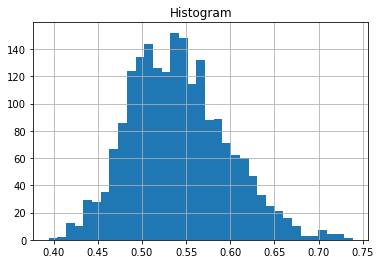

In [550]:
extra_df['eFG'].hist(bins=35)
plt.title('Histogram');

In [469]:
y2, X2 = patsy.dmatrices('Points ~ AST', data=df, return_type="dataframe")

# Creating my new model
model = sm.OLS(y2, X2)

# Fit my model
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.05
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.24e-05
Time:                        15:02:30   Log-Likelihood:                -9724.0
No. Observations:                2460   AIC:                         1.945e+04
Df Residuals:                    2458   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.4389      1.614     64.721      0.000     101.275     107.603
AST            0.1132      0.027      4.248      0.000       0.061       0.165
==============================================================================
Omnibus:                       12.138   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.429
Skew:                           0.149   Prob(JB):                      0.00200
Kurtosis:                       3.181   Cond. No.                         385.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

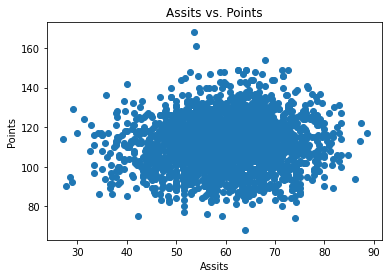

In [612]:
plt.scatter(df.AST,df.Points)
plt.title("Assits vs. Points")
plt.xlabel("Assits");
plt.ylabel("Points");

In [510]:
coefficient_dict = {'Metric': ['eFG', 'FTr', 'ORB', 'BLK', 'STL','TOV'],
                    'Coefficient': [9.67,2.77,3.10,0.15,0.49,-4.06] }

coeff_df = pd.DataFrame(coefficient_dict,
                       columns=['Metric', 'Coefficient'])

In [511]:
coeff_df

,Metric,Coefficient
0,eFG,9.67
1,FTr,2.77
2,ORB,3.10
3,BLK,0.15
4,STL,0.49
5,TOV,-4.06


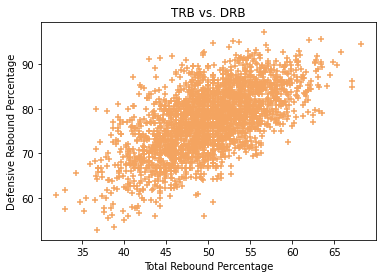

In [626]:
plt.scatter(df.TRB,df.DRB, color = 'sandybrown',marker="+")
plt.title("TRB vs. DRB")
plt.xlabel("Total Rebound Percentage");
plt.ylabel("Defensive Rebound Percentage");

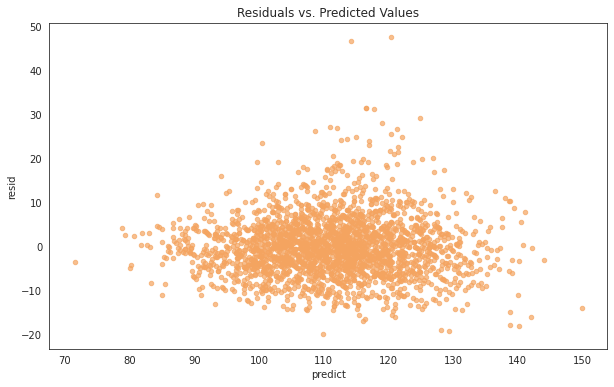

In [625]:
lr = LinearRegression()
fit = lr.fit(X,y)

stats_model_df['predict']= lr.predict(X)

stats_model_df['resid']=stats_model_df['Points'] - stats_model_df['predict']

with sns.axes_style('white'):
    plot=stats_model_df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.7,figsize=(10,6), color =  'sandybrown')
plt.title("Residuals vs. Predicted Values");